In [86]:
from helpers import transform_features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:

def load_data(noise_level, majority_vote = False, bits = 64, crps = 100000):
    folder = f"crps/arbiter_puf/{noise_level}noise"
    if majority_vote:
        folder += "_majority"
    
    chal_file = f"{folder}/APUF_{bits}bit_chal_{crps}.memmap"
    resp_file = f"{folder}/APUF_{bits}bit_resp_{crps}.memmap"
    
    challenges = transform_features(np.memmap(chal_file, shape=(crps, bits)))
    responses = np.memmap(resp_file, shape=(crps))
    
    return challenges, responses

In [88]:
def evaluate_model(challenges, responses, crps):
    X_train, X_test, y_train, y_test = train_test_split(
        challenges[:crps], 
        responses[:crps], 
        test_size=0.2, 
        random_state=42
    )
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy * 100

64 bit APUF Results:
0% noise:
CRPs:   100 accuracy: 75.0000
CRPs:  1000 accuracy: 94.5000
CRPs: 10000 accuracy: 99.3500
CRPs: 100000 accuracy: 99.8600
5% noise:
CRPs:   100 accuracy: 80.0000
CRPs:  1000 accuracy: 88.0000
CRPs: 10000 accuracy: 92.3000
CRPs: 100000 accuracy: 94.5450
5% (MV) noise:
CRPs:   100 accuracy: 90.0000
CRPs:  1000 accuracy: 94.0000
CRPs: 10000 accuracy: 98.9000
CRPs: 100000 accuracy: 99.6000
10% noise:
CRPs:   100 accuracy: 70.0000
CRPs:  1000 accuracy: 83.5000
CRPs: 10000 accuracy: 87.4000
CRPs: 100000 accuracy: 88.8300
10% (MV) noise:
CRPs:   100 accuracy: 80.0000
CRPs:  1000 accuracy: 93.5000
CRPs: 10000 accuracy: 98.4500
CRPs: 100000 accuracy: 98.9350
20% noise:
CRPs:   100 accuracy: 50.0000
CRPs:  1000 accuracy: 72.5000
CRPs: 10000 accuracy: 76.3500
CRPs: 100000 accuracy: 78.6900
20% (MV) noise:
CRPs:   100 accuracy: 60.0000
CRPs:  1000 accuracy: 87.5000
CRPs: 10000 accuracy: 92.6000
CRPs: 100000 accuracy: 93.6150
128 bit APUF Results:
0% noise:
CRPs:   100

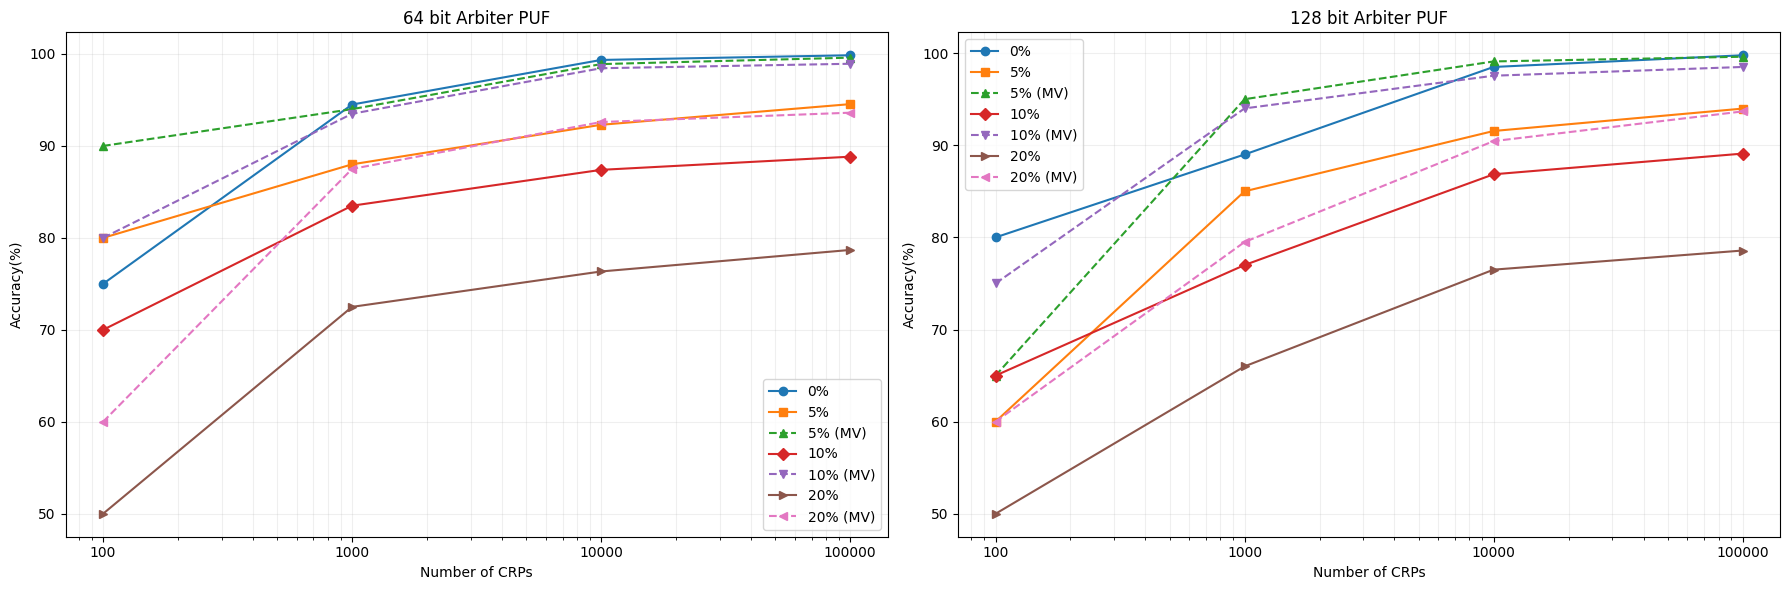

: 

In [ ]:
noise_levels = [0, 5, 10, 20]
crp_counts = [100, 1000, 10000, 100000]
bit_sizes = [64, 128]

results = {
    64: {
        '0%': [],
        '5%': [],
        '5% (MV)': [],
        '10%': [],
        '10% (MV)': [],
        '20%': [],
        '20% (MV)': []
    },
    128: {
        '0%': [],
        '5%': [],
        '5% (MV)': [],
        '10%': [],
        '10% (MV)': [],
        '20%': [],
        '20% (MV)': []
    }
}

for bits in bit_sizes:
    for crp in crp_counts:
        chal, resp = load_data(0, False, bits, 100000)
        results[bits]['0%'].append(evaluate_model(chal, resp, crp))
        
        chal, resp = load_data(5, False, bits, 100000)
        results[bits]['5%'].append(evaluate_model(chal, resp, crp))

        chal, resp = load_data(5, True, bits, 100000)
        results[bits]['5% (MV)'].append(evaluate_model(chal, resp, crp))
        
        chal, resp = load_data(10, False, bits, 100000)
        results[bits]['10%'].append(evaluate_model(chal, resp, crp))
        
        chal, resp = load_data(10, True, bits, 100000)
        results[bits]['10% (MV)'].append(evaluate_model(chal, resp, crp))
        
        chal, resp = load_data(20, False, bits, 100000)
        results[bits]['20%'].append(evaluate_model(chal, resp, crp))
        
        chal, resp = load_data(20, True, bits, 100000)
        results[bits]['20% (MV)'].append(evaluate_model(chal, resp, crp))

for bits in bit_sizes:
    print(f"{bits} bit APUF Results:")

    for label, accuracies in results[bits].items():
        print(f"{label} noise:")

        for crp, acc in zip(crp_counts, accuracies):
            print(f"CRPs: {crp:5} accuracy: {acc:.4f}")

plt.figure(figsize=(18, 6))

markers = ['o', 's', '^', 'D', 'v', '>', '<']

for i, n_bits in enumerate(bit_sizes):
    plt.subplot(1, 2, i+1)  
    
    for j, (label, accuracies) in enumerate(results[n_bits].items()):
        plt.plot(crp_counts, accuracies, 
                 label=label, 
                 marker=markers[j], 
                 linestyle='--' if '(MV)' in label else '-')
    
    plt.xscale("log")
    plt.xticks(crp_counts, labels=[str(x) for x in crp_counts])
    plt.xlabel("Number of CRPs")
    plt.ylabel("Accuracy(%)")
    plt.title(f"{n_bits} bit Arbiter PUF")
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()